# **Part - 1**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
import tensorflow
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
import cv2
import time
import random
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation  

In [3]:
# Path to Datasets
# Training Path
train_caries_path = "/content/drive/MyDrive/teeth_dataset/Augmented/teeth_dataset/training/caries"
train_no_caries_path = "/content/drive/MyDrive/teeth_dataset/Augmented/teeth_dataset/training/no-caries"

# Testing Path 
valid_caries_path = "/content/drive/MyDrive/teeth_dataset/Augmented/teeth_dataset/validation/caries"
valid_no_caries_path = "/content/drive/MyDrive/teeth_dataset/Augmented/teeth_dataset/validation/no-caries"

# Testing Path 
test_caries_path = "/content/drive/MyDrive/teeth_dataset/Augmented/teeth_dataset/test/caries"
test_no_caries_path = "/content/drive/MyDrive/teeth_dataset/Augmented/teeth_dataset/test/no-caries"

In [4]:
# Making Directory of Images
# Training Images
train_caries_image = os.listdir(train_caries_path)
train_no_caries_image = os.listdir(train_no_caries_path)

#Validation Images
valid_caries_image = os.listdir(valid_caries_path)
valid_no_caries_image = os.listdir(valid_no_caries_path)

#Testing Images
test_caries_image = os.listdir(test_caries_path)
test_no_caries_image = os.listdir(test_no_caries_path)

In [5]:
# Printing Numbers of Images in each Dataset
print("Number of Caries Images in Training = ",len(train_caries_image))
print("Number of No Caries Images in Training = ",len(train_no_caries_image))

print('\n')
print("Number of Caries Images in Validation = ",len(valid_caries_image))
print("Number of No Caries Images in Validation = ",len(valid_no_caries_image))

print('\n')
print("Number of Caries Images in Testing = ",len(test_caries_image))
print("Number of No Caries Images in Testing = ",len(test_no_caries_image))

Number of Caries Images in Training =  765
Number of No Caries Images in Training =  315


Number of Caries Images in Validation =  211
Number of No Caries Images in Validation =  211


Number of Caries Images in Testing =  210
Number of No Caries Images in Testing =  82


# **Part - 2**

Training Data

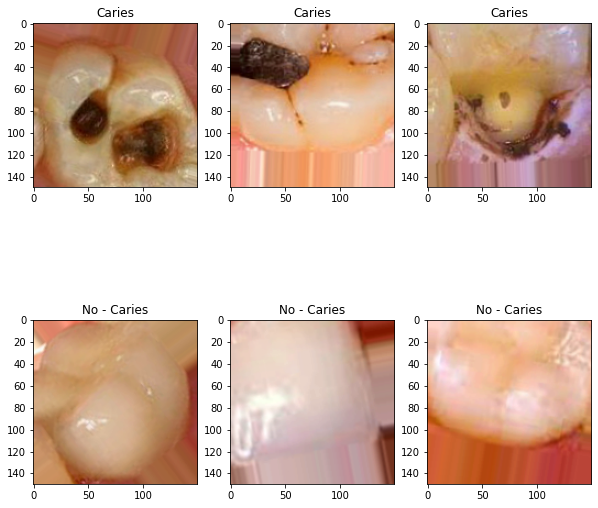

In [6]:
m=0
fig, axes = plt.subplots(2,3, figsize=(10,10))
axes = axes.ravel()

for i in range(3):
  img = plt.imread(train_caries_path + '/' + random.choice(train_caries_image))
  axes[m].imshow(img)
  axes[m].set_title("Caries")
  m=m+1

for i in range(3):
  img = plt.imread(train_no_caries_path + '/' + random.choice(train_no_caries_image))
  axes[m].imshow(img)
  axes[m].set_title("No - Caries")
  m=m+1

Validation Data

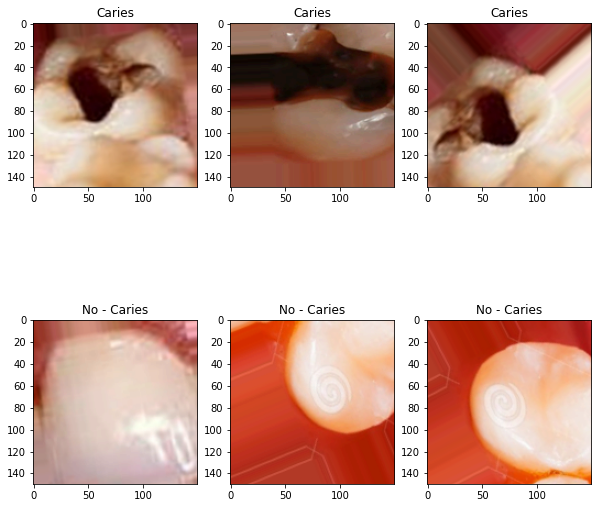

In [7]:
m=0
fig, axes = plt.subplots(2,3, figsize=(10,10))
axes = axes.ravel()

for i in range(3):
  img = plt.imread(valid_caries_path + '/' + random.choice(valid_caries_image))
  axes[m].imshow(img)
  axes[m].set_title("Caries")
  m=m+1

for i in range(3):
  img = plt.imread(valid_no_caries_path + '/' + random.choice(valid_no_caries_image))
  axes[m].imshow(img)
  axes[m].set_title("No - Caries")
  m=m+1

Test Data

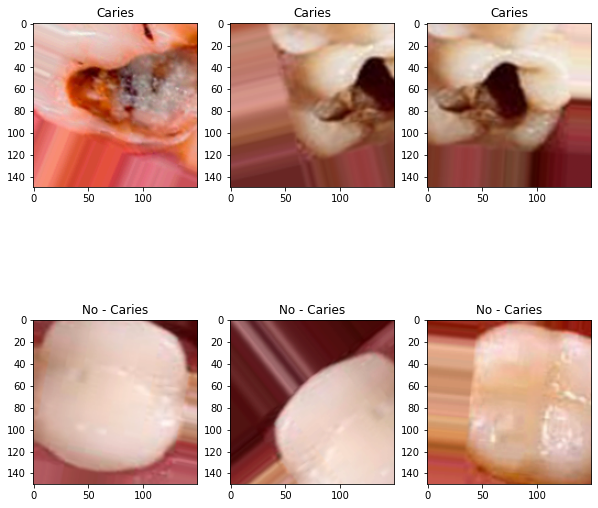

In [8]:
m=0
fig, axes = plt.subplots(2,3, figsize=(10,10))
axes = axes.ravel()

for i in range(3):
  img = plt.imread(test_caries_path + '/' + random.choice(test_caries_image))
  axes[m].imshow(img)
  axes[m].set_title("Caries")
  m=m+1

for i in range(3):
  img = plt.imread(test_no_caries_path + '/' + random.choice(test_no_caries_image))
  axes[m].imshow(img)
  axes[m].set_title("No - Caries")
  m=m+1

# **Part - 3**

Model

In [67]:
# Model
model=tf.keras.applications.InceptionResNetV2(weights='imagenet',include_top=False)
# Design new model
x=model.output
x=tf.keras.layers.GlobalMaxPool2D()(x)
x=tf.keras.layers.Dense(512,activation='relu')(x)
x=tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(512, activation = 'relu')(x)
x=tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
x=tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
x=tf.keras.layers.Dropout(0.3)(x)
preds = tf.keras.layers.Dense(2, activation = 'softmax')(x)  # This layer will have output. So It will have only one neuron
efficent_model=tf.keras.models.Model(inputs = model.input, outputs = preds)
opt=tf.keras.optimizers.legacy.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
efficent_model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=opt,metrics=['accuracy'])
efficent_model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d_1218 (Conv2D)           (None, None, None,   864         ['input_7[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization_1218 (Batc  (None, None, None,   96         ['conv2d_1218[0][0]']            
 hNormalization)                32)                                                         

In [68]:
for i,layer in enumerate(efficent_model.layers):
  print(i,layer.name)

0 input_7
1 conv2d_1218
2 batch_normalization_1218
3 activation_1218
4 conv2d_1219
5 batch_normalization_1219
6 activation_1219
7 conv2d_1220
8 batch_normalization_1220
9 activation_1220
10 max_pooling2d_24
11 conv2d_1221
12 batch_normalization_1221
13 activation_1221
14 conv2d_1222
15 batch_normalization_1222
16 activation_1222
17 max_pooling2d_25
18 conv2d_1226
19 batch_normalization_1226
20 activation_1226
21 conv2d_1224
22 conv2d_1227
23 batch_normalization_1224
24 batch_normalization_1227
25 activation_1224
26 activation_1227
27 average_pooling2d_6
28 conv2d_1223
29 conv2d_1225
30 conv2d_1228
31 conv2d_1229
32 batch_normalization_1223
33 batch_normalization_1225
34 batch_normalization_1228
35 batch_normalization_1229
36 activation_1223
37 activation_1225
38 activation_1228
39 activation_1229
40 mixed_5b
41 conv2d_1233
42 batch_normalization_1233
43 activation_1233
44 conv2d_1231
45 conv2d_1234
46 batch_normalization_1231
47 batch_normalization_1234
48 activation_1231
49 activation

In [69]:
# set layers for training
#layer upto 790 is already trained

for layer in efficent_model.layers[:790]:
  layer.trainable=False
for layer in efficent_model.layers[790:]:
  layer.trainable=True

In [70]:
# prepare Training data
train_generator=ImageDataGenerator()
#train_generator=ImageDataGenerator(preprocessing_function=tf.keras.applications.efficientnet_v2.preprocess_input)
train_data=train_generator.flow_from_directory("/content/drive/MyDrive/teeth_dataset/Augmented/teeth_dataset/training",target_size=(150,150),class_mode='categorical', shuffle=True)

Found 1080 images belonging to 2 classes.


In [71]:
# prepare Validation data
valid_generator=ImageDataGenerator()
valid_data=valid_generator.flow_from_directory("/content/drive/MyDrive/teeth_dataset/Augmented/teeth_dataset/validation",target_size=(150,150),class_mode='categorical',shuffle=True)

Found 422 images belonging to 2 classes.


In [72]:
# prepare Test data
test_generator=ImageDataGenerator()
test_data=test_generator.flow_from_directory("/content/drive/MyDrive/teeth_dataset/Augmented/teeth_dataset/test",target_size=(224,224),class_mode='categorical',shuffle=True)

Found 292 images belonging to 2 classes.


In [73]:
train_data.class_indices

{'caries': 0, 'no-caries': 1}

In [74]:
valid_data.class_indices

{'caries': 0, 'no-caries': 1}

In [75]:
test_data.class_indices

{'caries': 0, 'no-caries': 1}

In [76]:
hist=efficent_model.fit(train_data, epochs=60,validation_data=valid_data)

Epoch 1/60
34/34 [==============================] - 35s 487ms/step - loss: 0.6476 - accuracy: 0.6750 - val_loss: 0.7597 - val_accuracy: 0.4929
Epoch 2/60
34/34 [==============================] - 10s 279ms/step - loss: 0.4113 - accuracy: 0.8019 - val_loss: 0.6665 - val_accuracy: 0.5000
Epoch 3/60
34/34 [==============================] - 10s 296ms/step - loss: 0.1749 - accuracy: 0.9306 - val_loss: 0.4531 - val_accuracy: 0.7915
Epoch 4/60
34/34 [==============================] - 10s 301ms/step - loss: 0.0687 - accuracy: 0.9759 - val_loss: 0.3204 - val_accuracy: 0.9028
Epoch 5/60
34/34 [==============================] - 10s 305ms/step - loss: 0.0408 - accuracy: 0.9889 - val_loss: 0.2135 - val_accuracy: 0.9479
Epoch 6/60
34/34 [==============================] - 10s 288ms/step - loss: 0.0281 - accuracy: 0.9898 - val_loss: 0.1483 - val_accuracy: 0.9526
Epoch 7/60
34/34 [==============================] - 10s 297ms/step - loss: 0.0094 - accuracy: 0.9981 - val_loss: 0.1292 - val_accuracy: 0.9431

In [77]:
final_model=efficent_model.save("Inception.h5")

# **Part - 4**

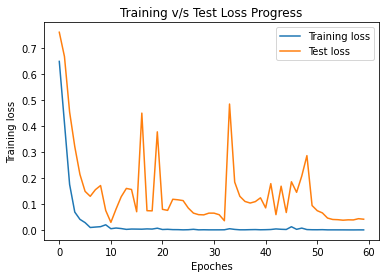

In [78]:
plt.plot(hist.history['loss'], label='Training loss')
plt.plot(hist.history['val_loss'], label='Test loss')
plt.xlabel("Epoches")
plt.ylabel("Training loss")
plt.title("Training v/s Test Loss Progress")
plt.legend()

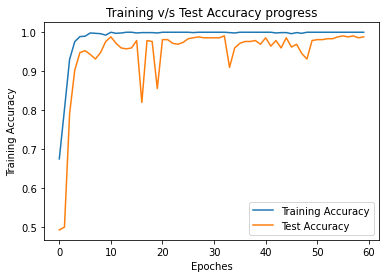

In [79]:
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Test Accuracy')
plt.xlabel("Epoches")
plt.ylabel("Training Accuracy")
plt.title("Training v/s Test Accuracy progress")
plt.legend()

# **Part - 5**

Training Data

In [80]:
# prepare Training data
train_generator=ImageDataGenerator()
#train_generator=ImageDataGenerator(preprocessing_function=tf.keras.applications.efficientnet_v2.preprocess_input)
train_data_1 = train_generator.flow_from_directory("/content/drive/MyDrive/teeth_dataset/Augmented/teeth_dataset/training",target_size=(150,150),class_mode='categorical',batch_size=32, shuffle=False)

Found 1080 images belonging to 2 classes.


In [81]:
train_data_1.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [82]:
# Training Data
actual_train_class=train_data_1.classes
actual_valid_class=valid_data.classes
from sklearn.metrics import confusion_matrix
train_data_1.reset()
y_train_pred = efficent_model.predict(train_data_1)
y_train_pred =np.argmax(y_train_pred, axis=1)

34/34 [==============================] - 7s 97ms/step


1.0

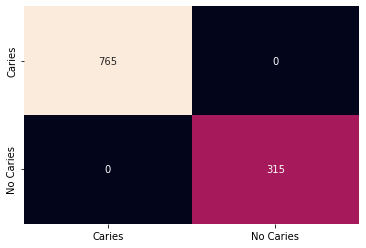

In [83]:
cm = confusion_matrix(actual_train_class, y_train_pred)
sns.heatmap(cm, annot=True,fmt='d', xticklabels=['Caries','No Caries'], yticklabels=['Caries','No Caries'],cbar=False)

from sklearn.metrics import accuracy_score, classification_report
accuracy_score(actual_train_class, y_train_pred)

In [84]:
print(classification_report(actual_train_class, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       765
           1       1.00      1.00      1.00       315

    accuracy                           1.00      1080
   macro avg       1.00      1.00      1.00      1080
weighted avg       1.00      1.00      1.00      1080



In [85]:
print(efficent_model.evaluate(train_data_1))

34/34 [==============================] - 4s 102ms/step - loss: 2.1696e-06 - accuracy: 1.0000
[2.169618937841733e-06, 1.0]


Validation Data

In [86]:
# prepare Validation data
valid_generator=ImageDataGenerator()
valid_data_1 = valid_generator.flow_from_directory("/content/drive/MyDrive/teeth_dataset/Augmented/teeth_dataset/validation",target_size=(150,150),class_mode='categorical',shuffle=False,batch_size=32)

Found 422 images belonging to 2 classes.


14/14 [==============================] - 1s 95ms/step


<Axes: >

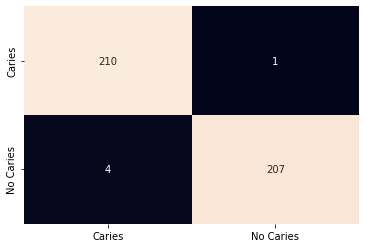

In [87]:
actual_valid_class=valid_data_1.classes

y_valid_pred = efficent_model.predict(valid_data_1)
y_valid_pred =np.argmax(y_valid_pred, axis=1)

cm = confusion_matrix(actual_valid_class, y_valid_pred)
sns.heatmap(cm, annot=True,fmt='d', xticklabels=['Caries','No Caries'], yticklabels=['Caries','No Caries'],cbar=False)

In [88]:
print(classification_report(actual_valid_class, y_valid_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       211
           1       1.00      0.98      0.99       211

    accuracy                           0.99       422
   macro avg       0.99      0.99      0.99       422
weighted avg       0.99      0.99      0.99       422



In [89]:
print(efficent_model.evaluate(valid_data_1))

14/14 [==============================] - 1s 94ms/step - loss: 0.0412 - accuracy: 0.9882
[0.041231367737054825, 0.9881516695022583]


Test Data

In [97]:
# prepare Test data
test_generator=ImageDataGenerator()
test_data_1 = test_generator.flow_from_directory("/content/drive/MyDrive/teeth_dataset/Augmented/teeth_dataset/test",target_size=(150,150),class_mode='categorical',shuffle=False,batch_size=32)

Found 292 images belonging to 2 classes.


10/10 [==============================] - 2s 164ms/step


<Axes: >

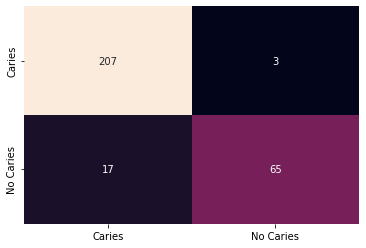

In [98]:
actual_test_class=test_data_1.classes

y_test_pred = efficent_model.predict(test_data_1)
y_test_pred =np.argmax(y_test_pred, axis=1)

cm = confusion_matrix(actual_test_class, y_test_pred)
sns.heatmap(cm, annot=True,fmt='d', xticklabels=['Caries','No Caries'], yticklabels=['Caries','No Caries'],cbar=False)

In [99]:
print(classification_report(actual_test_class, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       210
           1       0.96      0.79      0.87        82

    accuracy                           0.93       292
   macro avg       0.94      0.89      0.91       292
weighted avg       0.93      0.93      0.93       292



In [100]:
print(efficent_model.evaluate(test_data_1))

10/10 [==============================] - 1s 92ms/step - loss: 0.3451 - accuracy: 0.9315
[0.3451484143733978, 0.931506872177124]


# **Part - 6**

Training

1/1 [==============================] - 0s 52ms/step


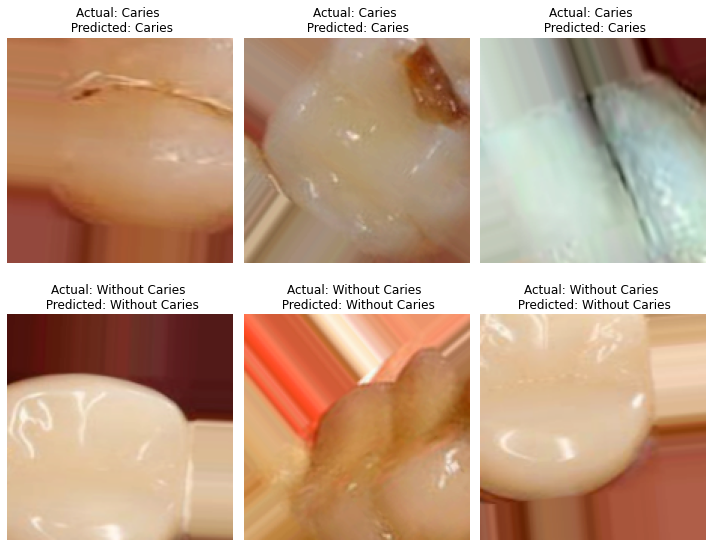

In [94]:
from tensorflow.keras.preprocessing.image import img_to_array
fig, axes=plt.subplots(2,3, figsize=(10,10))
axes=axes.ravel()
plt.subplots_adjust(hspace=0.4)

i=0
for j in train_caries_image:
  if(i<=2):
    test_img=load_img(train_caries_path+'/'+j, target_size=(150,150))
    axes[i].imshow(test_img)
    test_img=img_to_array(test_img)
    test_imag= test_img.reshape(1,150,150,3)
   
    pred=efficent_model.predict(test_imag)
    pred= np.argmax(pred)
    if pred==0:
      result='Caries'
    elif pred==1:
      result='Without Caries'

    axes[i].set_title("Actual: Caries \n Predicted: {}".format(result))
    axes[i].axis('off')
    i=i+1
    
for j in train_no_caries_image:
  if(i>2 and i <6):
    test_img=load_img(train_no_caries_path+'/'+j, target_size=(150,150))
    axes[i].imshow(test_img)
    test_img=img_to_array(test_img)
    test_imag= test_img.reshape(1,150,150,3)
  
    pred=efficent_model.predict(test_imag)
    pred= np.argmax(pred)
    if pred==0:
      result='Caries'
    elif pred==1:
      result='Without Caries'

    axes[i].set_title("Actual: Without Caries \n Predicted: {}".format(result))
    axes[i].axis('off')
    i=i+1
 

fig.tight_layout()
fig.tight_layout()
fig.tight_layout()
fig.tight_layout()

Validation

1/1 [==============================] - 0s 76ms/step


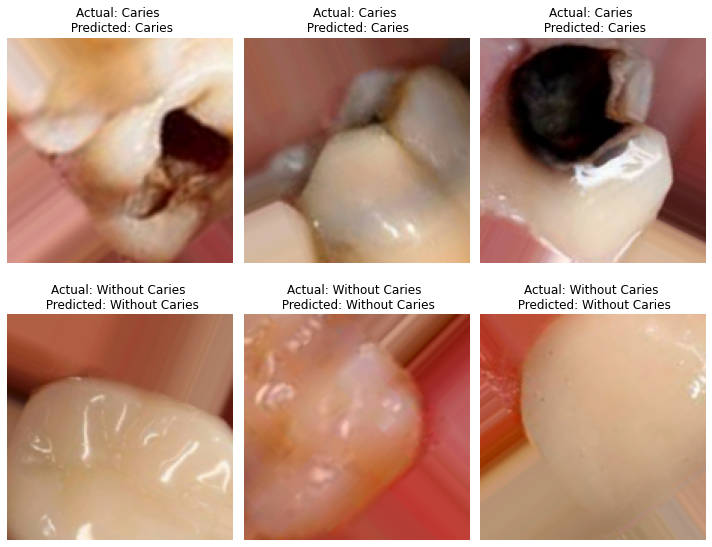

In [95]:
from tensorflow.keras.preprocessing.image import img_to_array
fig, axes=plt.subplots(2,3, figsize=(10,10))
axes=axes.ravel()
plt.subplots_adjust(hspace=0.4)

i=0
for j in valid_caries_image:
  if(i<=2):
    test_img=load_img(valid_caries_path+'/'+j, target_size=(150,150))
    axes[i].imshow(test_img)
    test_img=img_to_array(test_img)
    test_imag= test_img.reshape(1,150,150,3)
   
    pred=efficent_model.predict(test_imag)
    pred= np.argmax(pred)
    if pred==0:
      result='Caries'
    elif pred==1:
      result='Without Caries'

    axes[i].set_title("Actual: Caries \n Predicted: {}".format(result))
    axes[i].axis('off')
    i=i+1
    
for j in valid_no_caries_image:
  if(i>2 and i <6):
    test_img=load_img(valid_no_caries_path+'/'+j, target_size=(150,150))
    axes[i].imshow(test_img)
    test_img=img_to_array(test_img)
    test_imag= test_img.reshape(1,150,150,3)
  
    pred=efficent_model.predict(test_imag)
    pred= np.argmax(pred)
    if pred==0:
      result='Caries'
    elif pred==1:
      result='Without Caries'

    axes[i].set_title("Actual: Without Caries \n Predicted: {}".format(result))
    axes[i].axis('off')
    i=i+1
 

fig.tight_layout()
fig.tight_layout()
fig.tight_layout()
fig.tight_layout()

Test

1/1 [==============================] - 0s 47ms/step


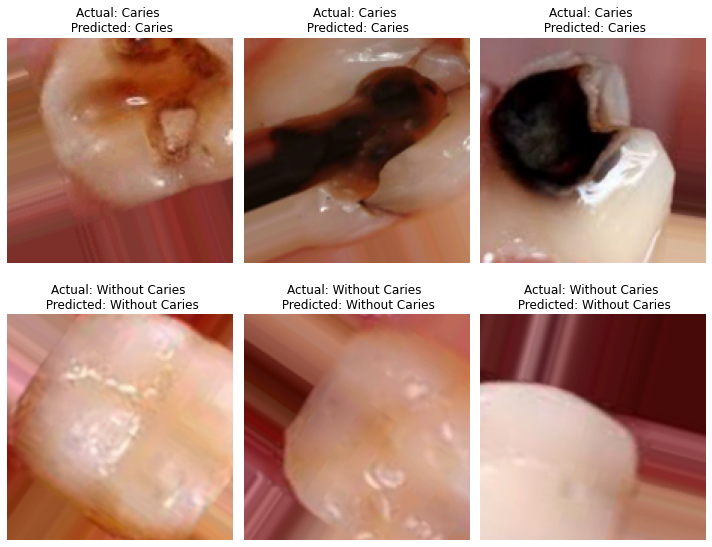

In [96]:
from tensorflow.keras.preprocessing.image import img_to_array
fig, axes=plt.subplots(2,3, figsize=(10,10))
axes=axes.ravel()
plt.subplots_adjust(hspace=0.4)

i=0
for j in test_caries_image:
  if(i<=2):
    test_img=load_img(test_caries_path+'/'+j, target_size=(150,150))
    axes[i].imshow(test_img)
    test_img=img_to_array(test_img)
    test_imag= test_img.reshape(1,150,150,3)
   
    pred=efficent_model.predict(test_imag)
    pred= np.argmax(pred)
    if pred==0:
      result='Caries'
    elif pred==1:
      result='Without Caries'

    axes[i].set_title("Actual: Caries \n Predicted: {}".format(result))
    axes[i].axis('off')
    i=i+1
    
for j in test_no_caries_image:
  if(i>2 and i <6):
    test_img=load_img(test_no_caries_path+'/'+j, target_size=(150,150))
    axes[i].imshow(test_img)
    test_img=img_to_array(test_img)
    test_imag= test_img.reshape(1,150,150,3)
  
    pred=efficent_model.predict(test_imag)
    pred= np.argmax(pred)
    if pred==0:
      result='Caries'
    elif pred==1:
      result='Without Caries'

    axes[i].set_title("Actual: Without Caries \n Predicted: {}".format(result))
    axes[i].axis('off')
    i=i+1
 

fig.tight_layout()
fig.tight_layout()
fig.tight_layout()
fig.tight_layout()